In [43]:
from PIL import Image
import os
import urllib
import io

In [19]:
# 读取所有图片路径
directory = []
def getFileDir(folder):
    if os.path.exists(folder):
        if os.path.isdir(folder):
            dirs = os.listdir(folder)
            for d in dirs:
                path = os.path.join(folder, d)
                if os.path.isdir(path):
                    getFileDir(path)
                else:
                    directory.append(path)
        else:
            directory.append(folder)
    else:
        print('% not exists'%folder)

In [20]:
#-*- coding:utf-8 -*-
path = r'C:\Users\ym\Downloads\图片助手(ImageAssistant) 图片批量下载器'
getFileDir(path)
print(len(directory))

3816


In [37]:
index = 0
root = './imgrgba'
count = 0
def narrow(array):
    global count
    global index
    for d in array:
        try:
            if os.path.exists(d):
                image = Image.open(d)
                prefix = image.format
                w = image.size[0]
                h = image.size[1]
                cutW = w // 8
                cutH = h //8
                cropWEnd = w - cutW
                cropHEnd = h - cutH
                cropImage = image.crop((cutW, cutH, cropWEnd, cropHEnd))
                savePath = os.path.join(root, str(index) + '.' + prefix.lower())
                cropImage.save(savePath, prefix)
                index = index + 1
        except Exception as e:
            count = count + 1


In [38]:
narrow(directory)
print(count)

709


In [35]:
index = 0
root = './img'
count = 0
def narrowandL(array):
    global count
    global index
    for d in array:
        try:
            if os.path.exists(d):
                image = Image.open(d)
                prefix = image.format
                w = image.size[0]
                h = image.size[1]
                cutW = w // 8
                cutH = h //8
                cropWEnd = w - cutW
                cropHEnd = h - cutH
                cropImage = image.crop((cutW, cutH, cropWEnd, cropHEnd))
                im = cropImage.convert('L')
                savePath = os.path.join(root, str(index) + '.' + prefix.lower())
                im.save(savePath, prefix)
                index = index + 1
        except Exception as e:
            count = count + 1


In [36]:
narrowandL(directory)
print(count)

709


In [41]:
#将图片二值化化和压缩
from IPython.display import display

In [59]:
root = './binary'
def binaryImage(array):
    index = 0
    for item in array:
        if os.path.exists(item):
            im = Image.open(item)
            imFormat = im.format.lower()
            binaryIm = im.point(lambda x: white if x > 128 else black)
            _path = os.path.join(root, str(index) + '.' + imFormat)
            index = index + 1
            binaryIm.save(_path)

In [60]:
path = r'D:\jupyter\car-management\recognitionalgorithm\img'
getFileDir(path)
print(len(directory))
binaryImage(directory)

19341


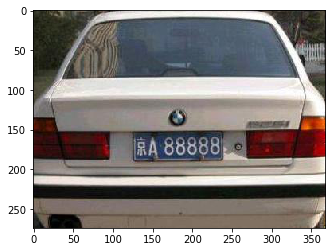

In [22]:
from IPython.display import display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# 图像归一化
def imagenorm(path):
    image = Image.open(path)
    array = np.array(image, 'f')
    min = array.min()
    max = array.max()
    newArray = (array - min) / (max - min)
    return newArray
# plt.imshow(mpimg.imread('./imgrgba/8.jpeg'))
im = imagenorm('./imgrgba/8.jpeg')
plt.imshow(im)

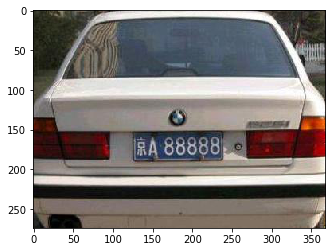

In [21]:
# plt.imshow(mpimg.imread('./imgrgba/8.jpeg'))
im = imagenorm('./imgrgba/8.jpeg')
plt.imshow(im)

In [30]:
def histeq(im, nbr_bins = 256):
    imhist, bins = np.histogram(im.flatten(), nbr_bins, normed = True)
    cdf = imhist.cumsum()
    cdf = 255 * cdf / cdf[-1]
    im2 = np.interp(im.flatten(), bins[:-1], cdf)
    return im2.reshape(im.shape), cdf

In [31]:
import matplotlib.image as mpimage

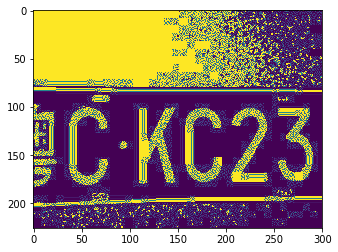

In [33]:
im = mpimage.imread('./binary/0.jpeg')
newIm, cdf = histeq(im)
plt.imshow(newIm)

In [4]:
#去噪
import numpy as np

In [6]:
x = np.arange(10)
x1 = np.reshape(x, [2, 5])


In [10]:
print(np.roll(x1, 2, axis = 1))

[[3 4 0 1 2]
 [8 9 5 6 7]]
